# 3. 자연어처리 개요

## 단어표현
- 자연어를 컴퓨터에게 인식시키기 위한 방법
- 단어임베딩(word embedding)또는 단어 벡터(word vector)로 표현

가장기본적인 방법 -> 원 핫 인코딩 ( one hot encoding)

예를들어, 남자, 여자, 아빠, 엄마, 삼촌, 이모 라는 여섯개의 단어를 표현해야 하는 경우
- 남자 = 1,0,0,0,0,0
- 여자 = 0,1,0,0,0,0
- 아빠 = 0,0,1,0,0,0
- 엄마 = 0,0,0,1,0,0
- 삼촌 = 0,0,0,0,1,0
- 이모 = 0,0,0,0,0,1
단점 : 실제로 자연어 단어는 수백만개. 이들 단어를 표현하기 위한 벡터의 크기가 너무 커짐

벡터값 자체에 단어의 의미나 특성이 전혀 표현되지 않는다.




In [1]:
# TF-IDF 벡터라이즈 코드
from sklearn.feature_extraction.text import TfidfVectorizer

sent = ("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.","폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.")
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent)
idf = tfidf_vectorizer.idf_
print(tfidf_matrix)

  (0, 11)	0.23061650387901597
  (0, 6)	0.3241234495558481
  (0, 4)	0.3241234495558481
  (0, 1)	0.3241234495558481
  (0, 9)	0.3241234495558481
  (0, 13)	0.23061650387901597
  (0, 8)	0.3241234495558481
  (0, 12)	0.3241234495558481
  (0, 5)	0.3241234495558481
  (0, 7)	0.3241234495558481
  (0, 16)	0.23061650387901597
  (1, 15)	0.36469322896147516
  (1, 3)	0.36469322896147516
  (1, 10)	0.36469322896147516
  (1, 0)	0.36469322896147516
  (1, 2)	0.36469322896147516
  (1, 14)	0.36469322896147516
  (1, 11)	0.2594822360637418
  (1, 13)	0.2594822360637418
  (1, 16)	0.2594822360637418


In [2]:
# TF-IDF로 vectorize 한 후, 코사인 유사도를 구하는 코드
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])


array([[0.17952266]])

In [3]:
# 유클라디안 유사도를 구하는 코드
from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances(tfidf_matrix[0:1], tfidf_matrix[1:2])

array([[1.28099753]])

In [4]:
print(tfidf_matrix)

  (0, 11)	0.23061650387901597
  (0, 6)	0.3241234495558481
  (0, 4)	0.3241234495558481
  (0, 1)	0.3241234495558481
  (0, 9)	0.3241234495558481
  (0, 13)	0.23061650387901597
  (0, 8)	0.3241234495558481
  (0, 12)	0.3241234495558481
  (0, 5)	0.3241234495558481
  (0, 7)	0.3241234495558481
  (0, 16)	0.23061650387901597
  (1, 15)	0.36469322896147516
  (1, 3)	0.36469322896147516
  (1, 10)	0.36469322896147516
  (1, 0)	0.36469322896147516
  (1, 2)	0.36469322896147516
  (1, 14)	0.36469322896147516
  (1, 11)	0.2594822360637418
  (1, 13)	0.2594822360637418
  (1, 16)	0.2594822360637418


In [5]:
# 노말라이즈 후 유사도를 구하는 코드
import numpy as np
def l1_normalize(v):
    norm = np.sum(v)
    return v/norm

tfidf_norm_l1 = l1_normalize(tfidf_matrix)
euclidean_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.20491229]])

In [ ]:
# 맨해튼 거리 유사도
from sklearn.metrics.pairwise import manhattan_distances
manhattan_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.77865927]])

# EDA과정

EDA : Exploratory Data Analysis :  탐색적 데이터 분석

모델을 만들고 훈련시키기 전, 데이터에 대한 이해가 선행되어야 한다.

탐색적 데이터 분석은데이터에 대한 최대한 많은 정보를 찾아내는 것 



In [6]:
import os

import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

In [ ]:
data_set = tf.keras.utils.get_file(
      fname="imdb.tar.gz", 
      origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
      extract=True)

84131840/84125825 [==============================] - 9s 0us/step


In [ ]:
def data(directory):
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0
    
    return pd.concat([pos_df, neg_df])

In [ ]:
def directory_data(directory):
    data = {}
    data["review"] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), "r", encoding='utf-8') as file:
            data["review"].append(file.read())
            
    return pd.DataFrame.from_dict(data)

In [ ]:
# data_set : '/root/.keras/datasets/imdb.tar.gz'
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

In [ ]:
train_df.head()

,review,sentiment
0,"Zero Day leads you to think, even re-think why...",1
1,"A typical Clausen film, but then again not typ...",1
2,I love this show!<br /><br />Every time i watc...,1
3,What is so taboo about love?! People seem to h...,1
4,I loved Long Way Round and wasn't even aware o...,1


In [ ]:
# 리뷰를 가져오고 
reviews = list(train_df['review'])
# 문자열 문장 리스트를 토크나이즈
tokenized_reviews = [r.split() for r in reviews]
# 토크나이즈 된 리스트에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]
# 토크나이즈 된 것을 붙여서 음절의 길이를 저장
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]

In [6]:
review_len_by_eumjeol

Text(0, 0.5, 'Number of Reviews')

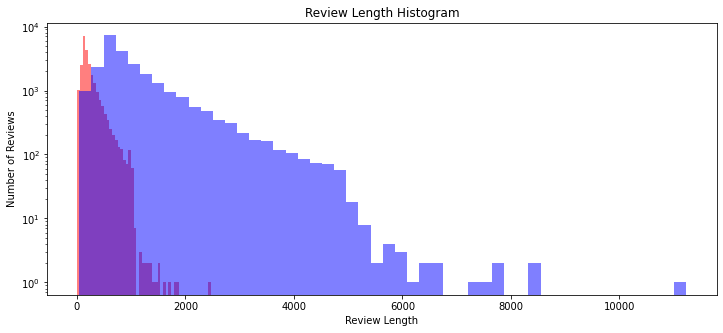

In [ ]:
# 리뷰 길이 히스토그램

import matplotlib.pyplot as plt

# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(review_len_by_token, bins=50, alpha=0.5, color= 'r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Review Length Histogram')
# 그래프 x 축 라벨
plt.xlabel('Review Length')
# 그래프 y 축 라벨
plt.ylabel('Number of Reviews')

In [ ]:
# 문장길이 분석
import numpy as np

print('문장 최대길이: {}'.format(np.max(review_len_by_token)))
print('문장 최소길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간길이: {}'.format(np.median(review_len_by_token)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대길이: 2470
문장 최소길이: 10
문장 평균길이: 233.79
문장 길이 표준편차: 173.73
문장 중간길이: 174.0
제 1 사분위 길이: 127.0
제 3 사분위 길이: 284.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f8634b25d50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8634b2cd50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8634b3b310>],
 'means': [<matplotlib.lines.Line2D at 0x7f8634b33d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8634b33850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8634b2c2d0>,
  <matplotlib.lines.Line2D at 0x7f8634b2c810>]}

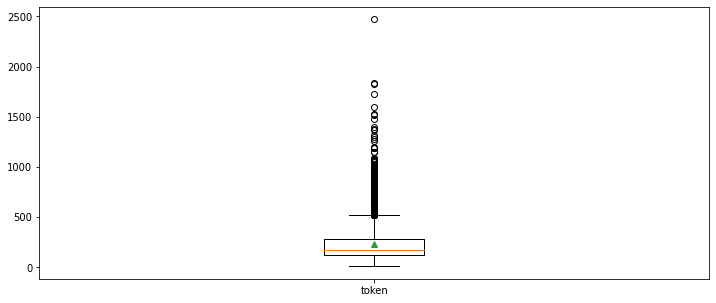

In [ ]:
# 토큰 길이 분포
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([review_len_by_token],
             labels=['token'],
             showmeans=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f8634a9a050>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8634aa0050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8634aa85d0>],
 'means': [<matplotlib.lines.Line2D at 0x7f8634aa8090>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8634aa0b10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8634a9a590>,
  <matplotlib.lines.Line2D at 0x7f8634a9aad0>]}

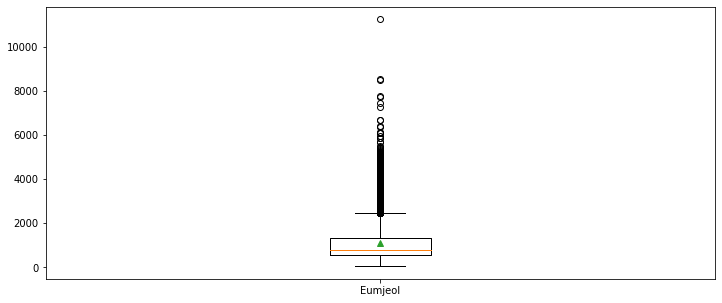

In [ ]:
# 음절 길이 분포
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_eumjeol],
             labels=['Eumjeol'], 
             showmeans=True)

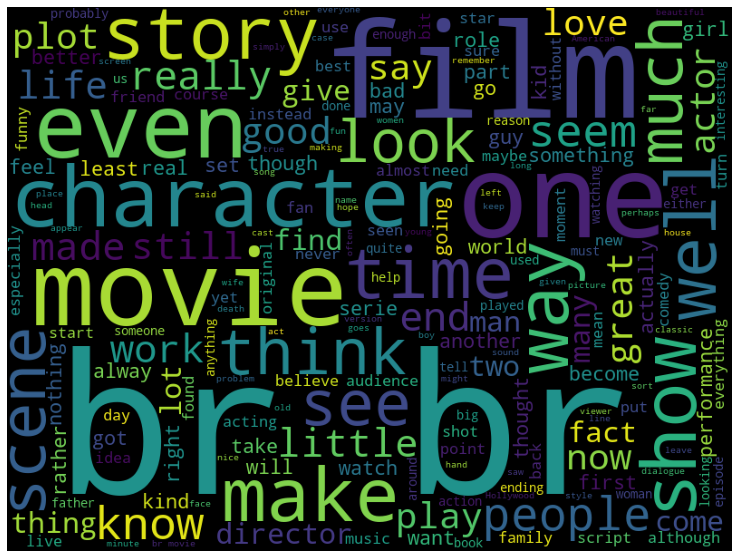

In [ ]:
# 데이터 워드 클라우드
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 800, height = 600).generate(' '.join(train_df['review']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


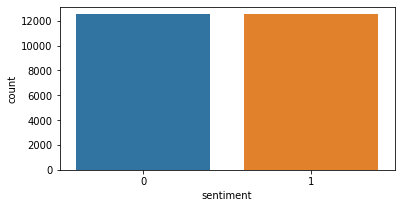

In [ ]:
# 라벨 빈도를 막대그래프로 나타냄
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_df['sentiment'])